In [17]:
import xgboost as xgb

In [18]:
print(xgboost.__version__)

2.0.0


In [19]:
# import the pandas library bcoz pandas has database and table related functions
import pandas as pd

In [20]:
# Here read the Salary_Data.csv by using pandas function and assigned values to the dataset variable.
dataset = pd.read_csv("insurance_pre.csv")

In [21]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [22]:
#Convert categorial data into numerical data
dataset = pd.get_dummies(dataset, drop_first = True);

In [23]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [24]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [25]:
#Split input and output
independent = dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent= dataset[["charges"]]

In [26]:
#Split the train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state =0)

In [27]:
regressor = xgb.XGBRegressor(
    objective="reg:squarederror",  # Use squared error for regression
    n_estimators=100,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    max_depth=3,                  # Maximum depth of each tree
    random_state=42               # Seed for reproducibility
)

In [29]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred = regressor.predict(x_test)

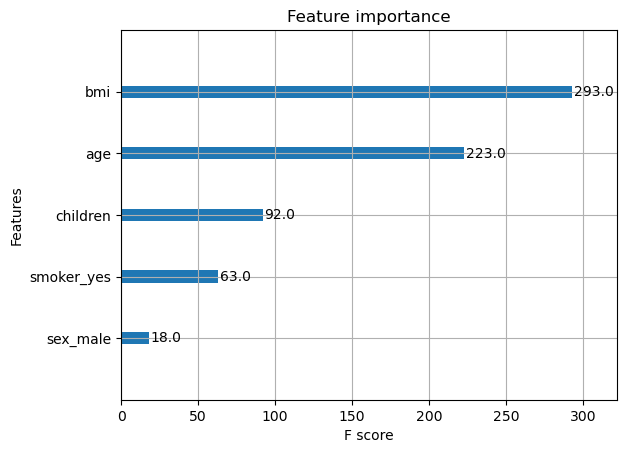

In [32]:
import matplotlib.pyplot as plt

xgb.plot_importance(regressor)
plt.show()

In [33]:
#Evaluation Metrics
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
r_score

0.8883086953350264